In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
import numpy as np
import math
import warnings
warnings.filterwarnings("ignore")

In [2]:
cols = ["M01AB","Year","Month","Hour","Weekday Name"]
data = pd.read_csv('pharma/salesdaily.csv',usecols=cols)
enc = LabelEncoder()
data.loc[:,['Weekday Name']] = data.loc[:,['Weekday Name']].apply(enc.fit_transform)

In [3]:
data.head()

,M01AB,Year,Month,Hour,Weekday Name
0,0.0,2014,1,248,4
1,8.0,2014,1,276,0
2,2.0,2014,1,276,2
3,4.0,2014,1,276,3
4,5.0,2014,1,276,1


## M01AB

In [8]:
arr_mean = data['M01AB'].rolling(6).mean()
data['MA'] = arr_mean

In [9]:
data.head()

,M01AB,Year,Month,Hour,Weekday Name,MA
0,0.0,2014,1,248,4,NaN
1,8.0,2014,1,276,0,NaN
2,2.0,2014,1,276,2,NaN
3,4.0,2014,1,276,3,NaN
4,5.0,2014,1,276,1,NaN


In [10]:
data.fillna(0,inplace=True)

In [11]:
features = data.drop(['M01AB'],axis=1)
target = data['M01AB']
x_train = features[:-7]
y_train = target[:-7]
x_test = features[-7:]
y_test = target[-7:]
y_test = np.asarray(y_test)

In [12]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
predictions = lr_model.predict(x_test)

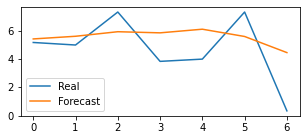

In [13]:
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [14]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

2.1071044356226833


In [15]:
n_estimators = [int(x) for x in np.linspace(start = 5,stop = 15,num=10)]
max_depth = [int(x) for x in np.linspace(3,10,num=7)]

In [16]:
dt_model = DecisionTreeRegressor(criterion='mse')
parameters = {
    'max_depth' : max_depth
}
model = GridSearchCV(dt_model, param_grid=parameters, scoring='neg_mean_absolute_error', cv=10)
model.fit(x_train,y_train)
model.best_params_

{'max_depth': 3}

In [17]:
dt_model = DecisionTreeRegressor(criterion='mse',max_depth=3)
dt_model.fit(x_train,y_train)
predictions = dt_model.predict(x_test)
y_test = np.asarray(y_test)

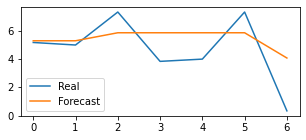

In [18]:
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [19]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

1.9306883884093151


In [20]:
rf = RandomForestRegressor(random_state = 1)
parameters = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth
    
}

model = GridSearchCV(rf, param_grid=parameters, scoring='neg_mean_absolute_error', cv=10)
model.fit(x_train,y_train)
model.best_params_

{'max_depth': 3, 'n_estimators': 15}

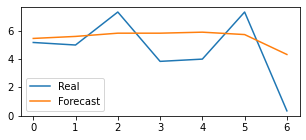

In [21]:
rf = RandomForestRegressor(random_state = 1,max_depth = 3,n_estimators = 15)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [22]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

2.0320451189253195


In [23]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror')
parameters = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
    'colsample_bytree': [0.3,0.5, 0.7],
    'learning_rate' : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ]
    
}
model = GridSearchCV(xg, param_grid=parameters,cv=10)
model.fit(x_train,y_train)
model.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.3,
 'max_depth': 3,
 'n_estimators': 12}

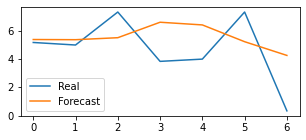

In [24]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror',n_estimators = 12,max_depth = 3,colsample_bytree= 0.7,learning_rate=0.3)
xg.fit(x_train,y_train)
predictions = xg.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [25]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

2.2984033133232584


## M01AE

In [27]:
cols = ["M01AE","Year","Month","Hour","Weekday Name"]
data = pd.read_csv('pharma/salesdaily.csv',usecols=cols)
enc = LabelEncoder()
data.loc[:,['Weekday Name']] = data.loc[:,['Weekday Name']].apply(enc.fit_transform)
arr_mean = data['M01AE'].rolling(5).mean()
data['MA'] = arr_mean
data.fillna(0,inplace=True)
features = data.drop(['M01AE'],axis=1)
target = data['M01AE']
x_train = features[:-7]
y_train = target[:-7]
x_test = features[-7:]
y_test = target[-7:]
y_test = np.asarray(y_test)

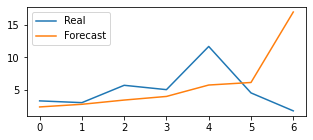

In [28]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
predictions = lr_model.predict(x_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [29]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

6.313944208609682


In [30]:
dt_model = DecisionTreeRegressor(criterion='mse')
parameters = {
    'max_depth' : max_depth
}
model = GridSearchCV(dt_model, param_grid=parameters, scoring='neg_mean_absolute_error', cv=10)
model.fit(x_train,y_train)
model.best_params_

{'max_depth': 3}

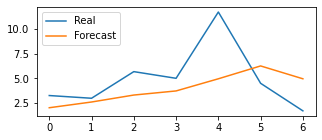

In [31]:
dt_model = DecisionTreeRegressor(criterion='mse',max_depth=3)
dt_model.fit(x_train,y_train)
predictions = dt_model.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [32]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

3.107916763673505


In [33]:
rf = RandomForestRegressor(random_state = 1)
parameters = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth
    
}

model = GridSearchCV(rf, param_grid=parameters, scoring='neg_mean_absolute_error', cv=10)
model.fit(x_train,y_train)
model.best_params_

{'max_depth': 4, 'n_estimators': 12}

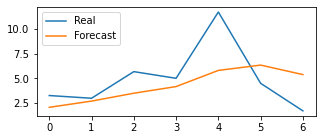

In [34]:
rf = RandomForestRegressor(random_state = 1,max_depth = 4,n_estimators = 12)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [35]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

2.8850341201875604


In [36]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror')
parameters = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
    'colsample_bytree': [0.3,0.5, 0.7],
    'learning_rate' : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ]
    
}
model = GridSearchCV(xg, param_grid=parameters,cv=10)
model.fit(x_train,y_train)
model.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.3,
 'max_depth': 3,
 'n_estimators': 15}

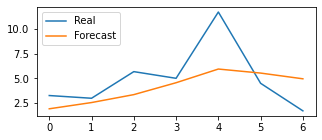

In [37]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror',n_estimators = 15,max_depth = 3,colsample_bytree= 0.7,learning_rate=0.3)
xg.fit(x_train,y_train)
predictions = xg.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [38]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

2.726869271457523


## N02BA

In [70]:
cols = ["N02BA","Year","Month","Hour","Weekday Name"]
data = pd.read_csv('pharma/salesdaily.csv',usecols=cols)
enc = LabelEncoder()
data.loc[:,['Weekday Name']] = data.loc[:,['Weekday Name']].apply(enc.fit_transform)
arr_mean = data['N02BA'].rolling(5).mean()
data['MA'] = arr_mean
data.fillna(0,inplace=True)
features = data.drop(['N02BA'],axis=1)
target = data['N02BA']
x_train = features[:-7]
y_train = target[:-7]
x_test = features[-7:]
y_test = target[-7:]
y_test = np.asarray(y_test)

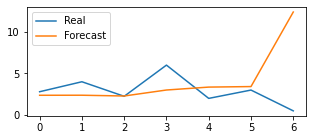

In [42]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
predictions = lr_model.predict(x_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [43]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

4.705827445825459


In [71]:
dt_model = DecisionTreeRegressor(criterion='mse')
parameters = {
    'max_depth' : max_depth
}
model = GridSearchCV(dt_model, param_grid=parameters, scoring='neg_mean_absolute_error', cv=10)
model.fit(x_train,y_train)
model.best_params_

{'max_depth': 3}

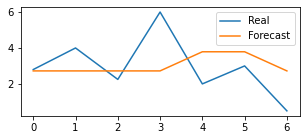

In [72]:
dt_model = DecisionTreeRegressor(criterion='mse',max_depth=3)
dt_model.fit(x_train,y_train)
predictions = dt_model.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [73]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

1.7467652033869638


In [44]:
rf = RandomForestRegressor(random_state = 1)
parameters = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth
    
}

model = GridSearchCV(rf, param_grid=parameters, scoring='neg_mean_absolute_error', cv=10)
model.fit(x_train,y_train)
model.best_params_

{'max_depth': 3, 'n_estimators': 13}

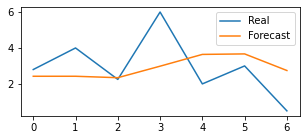

In [45]:
rf = RandomForestRegressor(random_state = 1,max_depth = 3,n_estimators = 13)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [46]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

1.6859752971860906


In [47]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror')
parameters = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
    'colsample_bytree': [0.3,0.5, 0.7],
    'learning_rate' : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ]
    
}
model = GridSearchCV(xg, param_grid=parameters,cv=10)
model.fit(x_train,y_train)
model.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.3,
 'max_depth': 3,
 'n_estimators': 13}

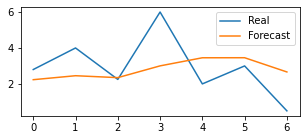

In [48]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror',n_estimators = 13,max_depth = 3,colsample_bytree= 0.7,learning_rate=0.3)
xg.fit(x_train,y_train)
predictions = xg.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [49]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

1.6346626077174156


## N02BE

In [74]:
cols = ["N02BE","Year","Month","Hour","Weekday Name"]
data = pd.read_csv('pharma/salesdaily.csv',usecols=cols)
enc = LabelEncoder()
data.loc[:,['Weekday Name']] = data.loc[:,['Weekday Name']].apply(enc.fit_transform)
arr_mean = data['N02BE'].rolling(5).mean()
data['MA'] = arr_mean
data.fillna(0,inplace=True)
features = data.drop(['N02BE'],axis=1)
target = data['N02BE']
x_train = features[:-7]
y_train = target[:-7]
x_test = features[-7:]
y_test = target[-7:]
y_test = np.asarray(y_test)

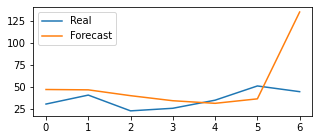

In [51]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
predictions = lr_model.predict(x_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [52]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

36.12441931504289


In [75]:
dt_model = DecisionTreeRegressor(criterion='mse')
parameters = {
    'max_depth' : max_depth
}
model = GridSearchCV(dt_model, param_grid=parameters, scoring='neg_mean_absolute_error', cv=10)
model.fit(x_train,y_train)
model.best_params_

{'max_depth': 3}

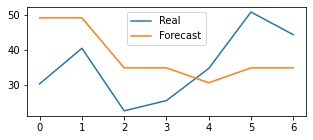

In [76]:
dt_model = DecisionTreeRegressor(criterion='mse',max_depth=3)
dt_model.fit(x_train,y_train)
predictions = dt_model.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [77]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

12.18190922912491


In [53]:
rf = RandomForestRegressor(random_state = 1)
parameters = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth
    
}

model = GridSearchCV(rf, param_grid=parameters, scoring='neg_mean_absolute_error', cv=10)
model.fit(x_train,y_train)
model.best_params_

{'max_depth': 5, 'n_estimators': 10}

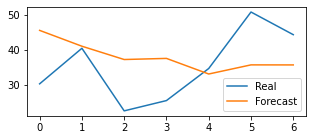

In [54]:
rf = RandomForestRegressor(random_state = 1,max_depth = 5,n_estimators = 10)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [55]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

11.378397840260066


In [56]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror')
parameters = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
    'colsample_bytree': [0.3,0.5, 0.7],
    'learning_rate' : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ]
    
}
model = GridSearchCV(xg, param_grid=parameters,cv=10)
model.fit(x_train,y_train)
model.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.25,
 'max_depth': 3,
 'n_estimators': 15}

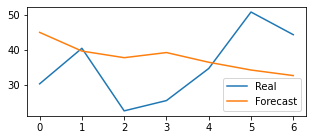

In [57]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror',n_estimators = 15,max_depth = 3,colsample_bytree= 0.7,learning_rate=0.25)
xg.fit(x_train,y_train)
predictions = xg.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [58]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

12.296750992925082


## N05B

In [79]:
cols = ["N05B","Year","Month","Hour","Weekday Name"]
data = pd.read_csv('pharma/salesdaily.csv',usecols=cols)
enc = LabelEncoder()
data.loc[:,['Weekday Name']] = data.loc[:,['Weekday Name']].apply(enc.fit_transform)
arr_mean = data['N05B'].rolling(5).mean()
data['MA'] = arr_mean
data.fillna(0,inplace=True)
features = data.drop(['N05B'],axis=1)
target = data['N05B']
x_train = features[:-7]
y_train = target[:-7]
x_test = features[-7:]
y_test = target[-7:]
y_test = np.asarray(y_test)

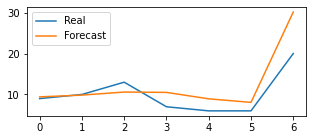

In [60]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
predictions = lr_model.predict(x_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [61]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

4.3742056061557495


In [80]:
dt_model = DecisionTreeRegressor(criterion='mse')
parameters = {
    'max_depth' : max_depth
}
model = GridSearchCV(dt_model, param_grid=parameters, scoring='neg_mean_absolute_error', cv=10)
model.fit(x_train,y_train)
model.best_params_

{'max_depth': 5}

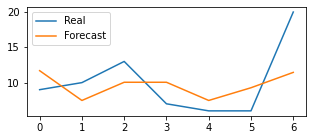

In [81]:
dt_model = DecisionTreeRegressor(criterion='mse',max_depth=5)
dt_model.fit(x_train,y_train)
predictions = dt_model.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [82]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

4.099286023031629


In [62]:
rf = RandomForestRegressor(random_state = 1)
parameters = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth
    
}

model = GridSearchCV(rf, param_grid=parameters, scoring='neg_mean_absolute_error', cv=10)
model.fit(x_train,y_train)
model.best_params_

{'max_depth': 5, 'n_estimators': 13}

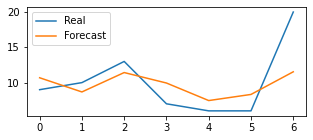

In [63]:
rf = RandomForestRegressor(random_state = 1,max_depth = 5,n_estimators = 13)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [64]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

3.683202387041844


In [65]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror')
parameters = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
    'colsample_bytree': [0.3,0.5, 0.7],
    'learning_rate' : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ]
    
}
model = GridSearchCV(xg, param_grid=parameters,cv=10)
model.fit(x_train,y_train)
model.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.3,
 'max_depth': 3,
 'n_estimators': 15}

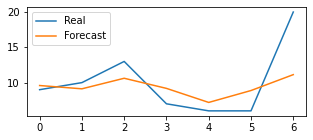

In [66]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror',n_estimators = 15,max_depth = 3,colsample_bytree= 0.7,learning_rate=0.3)
xg.fit(x_train,y_train)
predictions = xg.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [67]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

3.778669888945954


## N05C

In [93]:
cols = ["N05C","Year","Month","Hour","Weekday Name"]
data = pd.read_csv('pharma/salesdaily.csv',usecols=cols)
enc = LabelEncoder()
data.loc[:,['Weekday Name']] = data.loc[:,['Weekday Name']].apply(enc.fit_transform)
arr_mean = data['N05C'].rolling(5).mean()
data['MA'] = arr_mean
data.fillna(0,inplace=True)
features = data.drop(['N05C'],axis=1)
target = data['N05C']
x_train = features[:-7]
y_train = target[:-7]
x_test = features[-7:]
y_test = target[-7:]
y_test = np.asarray(y_test)

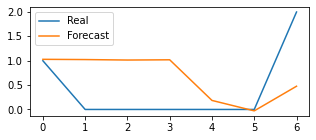

In [94]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
predictions = lr_model.predict(x_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [95]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

0.8842650064031016


In [90]:
dt_model = DecisionTreeRegressor(criterion='mse')
parameters = {
    'max_depth' : max_depth
}
model = GridSearchCV(dt_model, param_grid=parameters, scoring='neg_mean_absolute_error', cv=10)
model.fit(x_train,y_train)
model.best_params_

{'max_depth': 3}

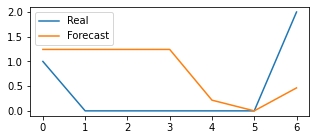

In [91]:
dt_model = DecisionTreeRegressor(criterion='mse',max_depth=3)
dt_model.fit(x_train,y_train)
predictions = dt_model.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [92]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

1.007066857339782


In [96]:
rf = RandomForestRegressor(random_state = 1)
parameters = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth
    
}

model = GridSearchCV(rf, param_grid=parameters, scoring='neg_mean_absolute_error', cv=10)
model.fit(x_train,y_train)
model.best_params_

{'max_depth': 4, 'n_estimators': 9}

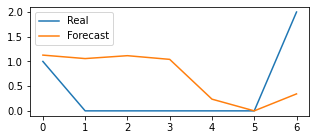

In [97]:
rf = RandomForestRegressor(random_state = 1,max_depth = 4,n_estimators = 9)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [98]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

0.946284378960699


In [99]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror')
parameters = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
    'colsample_bytree': [0.3,0.5, 0.7],
    'learning_rate' : [0.05, 0.10, 0.15, 0.20]
    
}
model = GridSearchCV(xg, param_grid=parameters,cv=10)
model.fit(x_train,y_train)
model.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.2,
 'max_depth': 3,
 'n_estimators': 15}

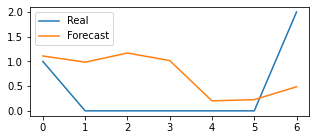

In [100]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror',n_estimators = 15,max_depth = 3,colsample_bytree= 0.7,learning_rate=0.2)
xg.fit(x_train,y_train)
predictions = xg.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [101]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

0.9077123189085409


## R03

In [102]:
cols = ["R03","Year","Month","Hour","Weekday Name"]
data = pd.read_csv('pharma/salesdaily.csv',usecols=cols)
enc = LabelEncoder()
data.loc[:,['Weekday Name']] = data.loc[:,['Weekday Name']].apply(enc.fit_transform)
arr_mean = data['R03'].rolling(5).mean()
data['MA'] = arr_mean
data.fillna(0,inplace=True)
features = data.drop(['R03'],axis=1)
target = data['R03']
x_train = features[:-7]
y_train = target[:-7]
x_test = features[-7:]
y_test = target[-7:]
y_test = np.asarray(y_test)

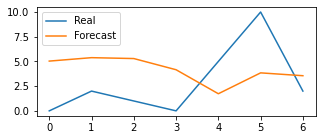

In [103]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
predictions = lr_model.predict(x_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [104]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

4.20054653733764


In [105]:
dt_model = DecisionTreeRegressor(criterion='mse')
parameters = {
    'max_depth' : max_depth
}
model = GridSearchCV(dt_model, param_grid=parameters, scoring='neg_mean_absolute_error', cv=10)
model.fit(x_train,y_train)
model.best_params_

{'max_depth': 4}

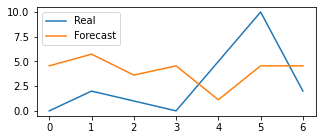

In [106]:
dt_model = DecisionTreeRegressor(criterion='mse',max_depth=4)
dt_model.fit(x_train,y_train)
predictions = dt_model.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [107]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

4.026727646521787


In [108]:
rf = RandomForestRegressor(random_state = 1)
parameters = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth
    
}

model = GridSearchCV(rf, param_grid=parameters, scoring='neg_mean_absolute_error', cv=10)
model.fit(x_train,y_train)
model.best_params_

{'max_depth': 3, 'n_estimators': 15}

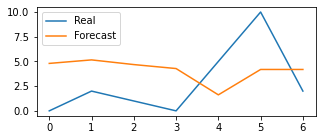

In [109]:
rf = RandomForestRegressor(random_state = 1,max_depth = 3,n_estimators = 15)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [110]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

4.051299392626028


In [111]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror')
parameters = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
    'colsample_bytree': [0.3,0.5, 0.7],
    'learning_rate' : [0.05, 0.10, 0.15, 0.20]
    
}
model = GridSearchCV(xg, param_grid=parameters,cv=10)
model.fit(x_train,y_train)
model.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.2,
 'max_depth': 3,
 'n_estimators': 13}

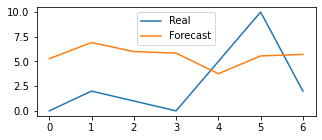

In [112]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror',n_estimators = 13,max_depth = 3,colsample_bytree= 0.7,learning_rate=0.2)
xg.fit(x_train,y_train)
predictions = xg.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [113]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

4.5689273220038


## R06

In [114]:
cols = ["R06","Year","Month","Hour","Weekday Name"]
data = pd.read_csv('pharma/salesdaily.csv',usecols=cols)
enc = LabelEncoder()
data.loc[:,['Weekday Name']] = data.loc[:,['Weekday Name']].apply(enc.fit_transform)
arr_mean = data['R06'].rolling(5).mean()
data['MA'] = arr_mean
data.fillna(0,inplace=True)
features = data.drop(['R06'],axis=1)
target = data['R06']
x_train = features[:-7]
y_train = target[:-7]
x_test = features[-7:]
y_test = target[-7:]
y_test = np.asarray(y_test)

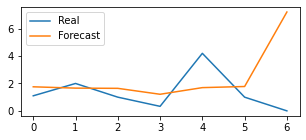

In [115]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
predictions = lr_model.predict(x_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [116]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

2.94460308179738


In [117]:
dt_model = DecisionTreeRegressor(criterion='mse')
parameters = {
    'max_depth' : max_depth
}
model = GridSearchCV(dt_model, param_grid=parameters, scoring='neg_mean_absolute_error', cv=10)
model.fit(x_train,y_train)
model.best_params_

{'max_depth': 3}

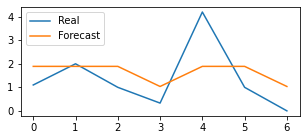

In [118]:
dt_model = DecisionTreeRegressor(criterion='mse',max_depth=3)
dt_model.fit(x_train,y_train)
predictions = dt_model.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [119]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

1.1419846286732787


In [120]:
rf = RandomForestRegressor(random_state = 1)
parameters = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth
    
}

model = GridSearchCV(rf, param_grid=parameters, scoring='neg_mean_absolute_error', cv=10)
model.fit(x_train,y_train)
model.best_params_

{'max_depth': 3, 'n_estimators': 8}

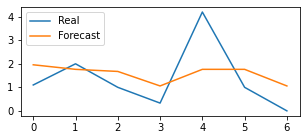

In [121]:
rf = RandomForestRegressor(random_state = 1,max_depth = 3,n_estimators = 8)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [122]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

1.1597381429123441


In [123]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror')
parameters = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
    'colsample_bytree': [0.3,0.5, 0.7],
    'learning_rate' : [0.05, 0.10, 0.15, 0.20]
    
}
model = GridSearchCV(xg, param_grid=parameters,cv=10)
model.fit(x_train,y_train)
model.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.2,
 'max_depth': 3,
 'n_estimators': 15}

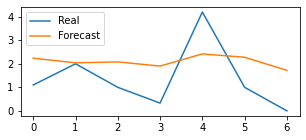

In [124]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror',n_estimators = 15,max_depth = 3,colsample_bytree= 0.7,learning_rate=0.2)
xg.fit(x_train,y_train)
predictions = xg.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [125]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

1.3470172089778687
